In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
data = pd.read_csv('C:\\Users\\Abhishek\\Downloads\\glass_data.csv', header=None)

In [3]:
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
data.columns = column_names

In [4]:
data.head(5)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data['Type of glass'] = data['Type of glass'].astype('category') 

In [6]:
data.dtypes

Id number           int64
RI                float64
Na                float64
Mg                float64
Al                float64
Si                float64
K                 float64
Ca                float64
Ba                float64
Fe                float64
Type of glass    category
dtype: object

In [7]:
data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

([<matplotlib.patches.Wedge at 0x8d67358>,
 [Text(0.483498,0.988043,'Building Window non Floated'),
  Text(-1.09242,-0.12889,'Building Window Floated'),
  Text(-2.02067e-16,-1.1,'Headlamps'),
  Text(0.687641,-0.858574,'Vehicle Window Floated'),
  Text(0.988043,-0.483498,'Containers'),
  Text(1.09041,-0.144913,'Tablewares')],
 [Text(0.263726,0.538933,'35.5%'),
  Text(-0.595867,-0.0703037,'32.7%'),
  Text(-1.10218e-16,-0.6,'13.6%'),
  Text(0.375077,-0.468313,'7.9%'),
  Text(0.538933,-0.263726,'6.1%'),
  Text(0.594771,-0.0790434,'4.2%')])

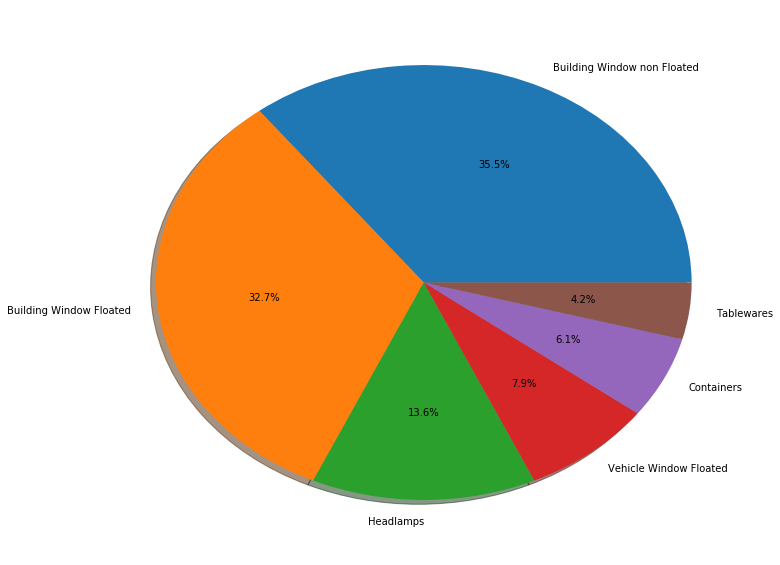

In [8]:
plt.figure(figsize=(12,10))
plt.pie(data['Type of glass'].value_counts(), labels= ['Building Window non Floated','Building Window Floated','Headlamps','Vehicle Window Floated','Containers','Tablewares'], autopct='%1.1f%%', shadow=True)
#plt.savefig('1.jpg')

In [9]:
data.drop(['Id number','Type of glass'], axis=1, inplace=True)

In [10]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
from sklearn.decomposition import PCA

In [12]:
reduced_data = PCA(n_components=2)
reduced_data = reduced_data.fit_transform(data)

Text(0.5,1,'Plot of data which is reduced to 2 features from 9 features')

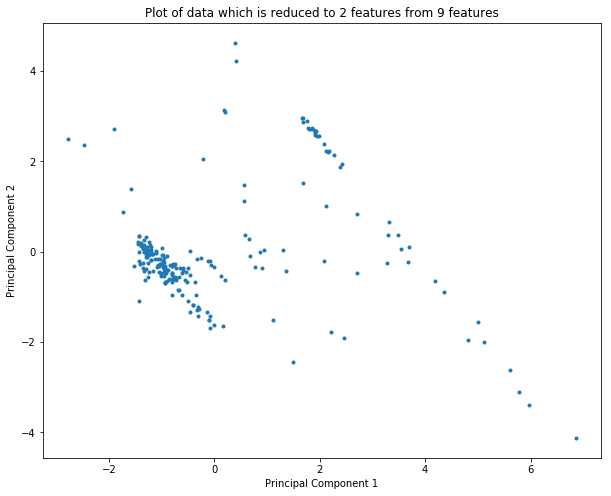

In [13]:
plt.figure(figsize=(10,8))
plt.plot(reduced_data.T[0], reduced_data.T[1],'.')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Plot of data which is reduced to 2 features from 9 features')

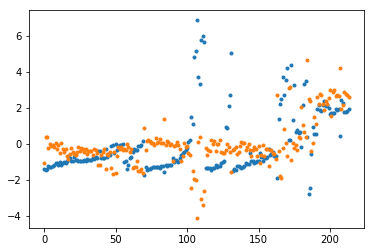

In [14]:
plt.plot(reduced_data,'.')

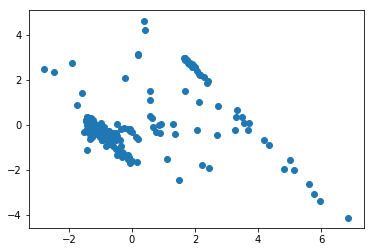

In [15]:
plt.scatter(reduced_data[:,0],reduced_data[:,1])

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [17]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(reduced_data)

array([0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 2, 2,
       3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 2, 2, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 5,
       0, 5, 5, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 4, 2, 3, 1, 1, 3, 0, 2,
       0, 0, 0, 0, 0, 4, 2, 2, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4], dtype=int64)

In [18]:
cluster1 = KMeans(n_clusters=6)
cluster1.fit_predict(reduced_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4,
       1, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 5, 5,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 5, 5, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 4, 5, 5, 5, 5, 5, 5, 2, 2, 5, 4, 5,
       4, 4, 4, 4, 0, 5, 5, 5, 2, 0, 0, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

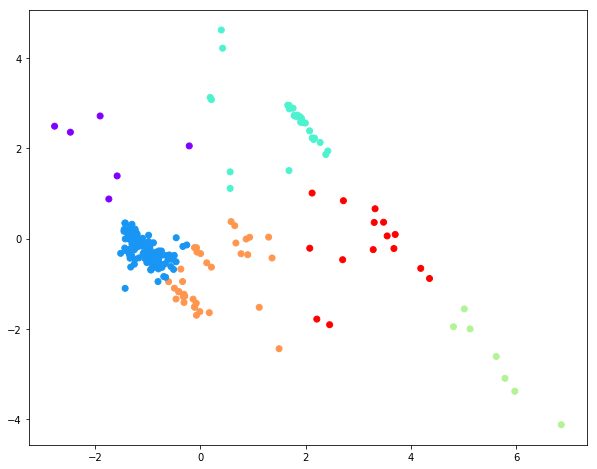

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c = cluster1.labels_, cmap='rainbow')

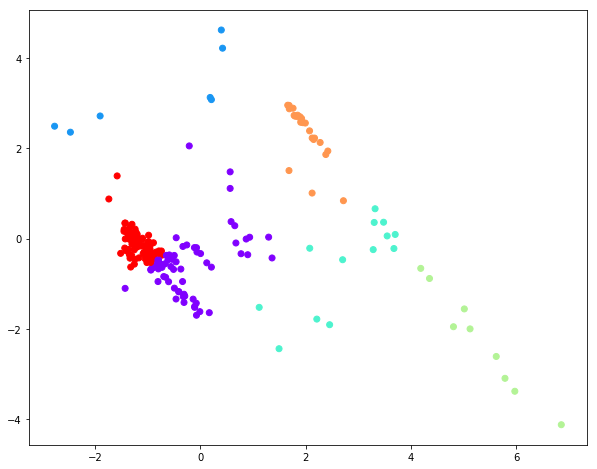

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c = cluster.labels_, cmap='rainbow')

([<matplotlib.patches.Wedge at 0xc64bc50>,
 [Text(0.224489,1.07685,'5'),
  Text(-0.915737,-0.609448,'0'),
  Text(0.394707,-1.02675,'4'),
  Text(0.868576,-0.674963,'2'),
  Text(1.03789,-0.364396,'3'),
  Text(1.0942,-0.11284,'1')],
 [Text(0.122449,0.587372,'43.5%'),
  Text(-0.499493,-0.332426,'31.8%'),
  Text(0.215295,-0.560043,'11.2%'),
  Text(0.473769,-0.368162,'6.1%'),
  Text(0.566122,-0.198761,'4.2%'),
  Text(0.596835,-0.061549,'3.3%')])

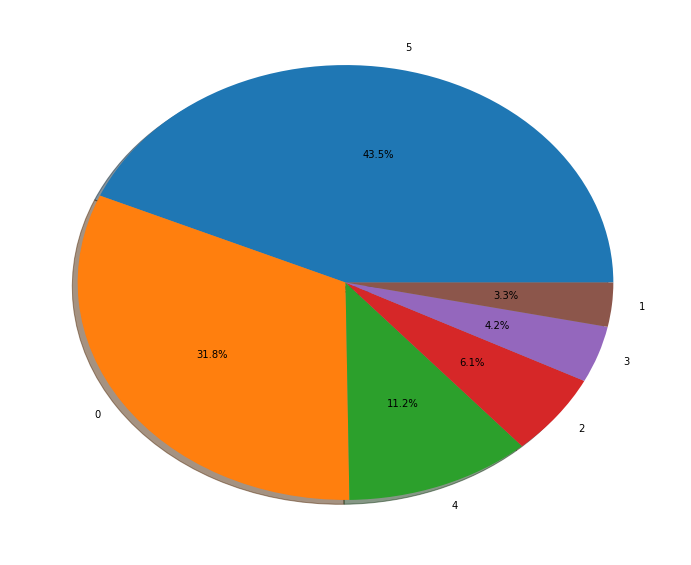

In [17]:
plt.figure(figsize=(12,10))
clust1 = pd.DataFrame(cluster.labels_)
clust1.columns = ['A']
plt.pie(clust1['A'].value_counts(), labels=clust1['A'].value_counts().index, autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x8e09f28>,
 [Text(-0.256005,1.0698,'0'),
  Text(-0.609448,-0.915736,'4'),
  Text(0.379592,-1.03243,'3'),
  Text(0.915736,-0.609448,'1'),
  Text(1.05749,-0.302856,'2'),
  Text(1.09574,-0.0967651,'5')],
 [Text(-0.139639,0.583525,'57.5%'),
  Text(-0.332426,-0.499493,'16.4%'),
  Text(0.20705,-0.563143,'13.6%'),
  Text(0.499493,-0.332426,'6.5%'),
  Text(0.576811,-0.165194,'3.3%'),
  Text(0.597674,-0.052781,'2.8%')])

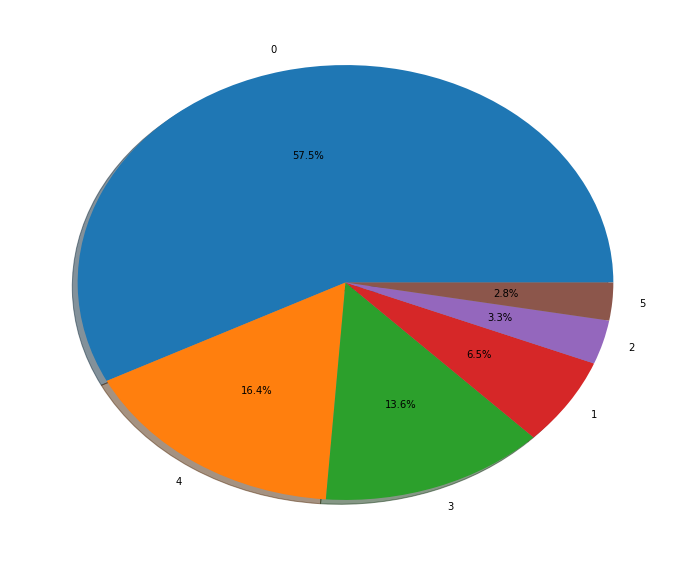

In [18]:
plt.figure(figsize=(12,10))
clust1 = pd.DataFrame(cluster1.labels_)
clust1.columns = ['A']
plt.pie(clust1['A'].value_counts(), labels=clust1['A'].value_counts().index, autopct='%1.1f%%', shadow=True)

In [19]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)
cluster1 = KMeans(n_clusters=6)
cluster1.fit_predict(data)

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 4, 4, 1, 1,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       3, 3, 3, 3, 5, 5, 1, 1, 5, 2, 2, 0, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

([<matplotlib.patches.Wedge at 0xc7ae240>,
 [Text(-0.364396,1.03789,'1'),
  Text(-0.454284,-1.00181,'2'),
  Text(0.424679,-1.01472,'3'),
  Text(0.924584,-0.595939,'4'),
  Text(1.0698,-0.256005,'5'),
  Text(1.09704,-0.0806693,'0')],
 [Text(-0.198761,0.566122,'60.7%'),
  Text(-0.247791,-0.546443,'15.0%'),
  Text(0.231643,-0.553481,'11.2%'),
  Text(0.504319,-0.325058,'7.9%'),
  Text(0.583525,-0.139639,'2.8%'),
  Text(0.598384,-0.0440015,'2.3%')])

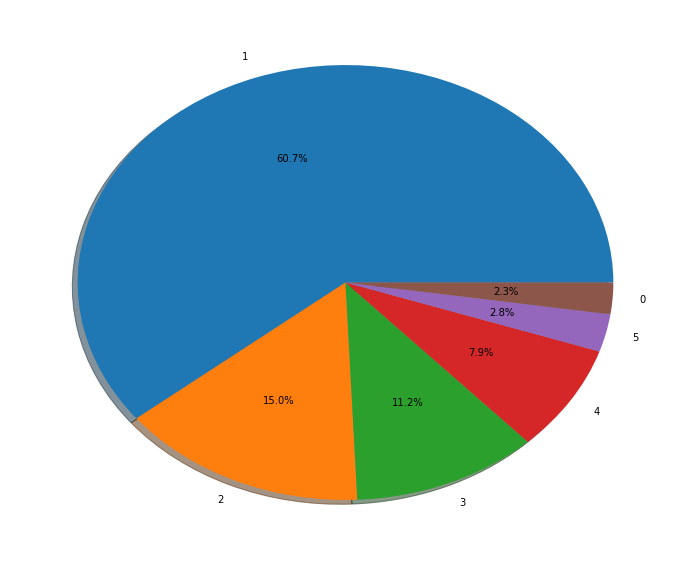

In [20]:
plt.figure(figsize=(12,10))
clust1 = pd.DataFrame(cluster.labels_)
clust1.columns = ['A']
plt.pie(clust1['A'].value_counts(), labels=clust1['A'].value_counts().index, autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0xc528630>,
 [Text(-0.271681,1.06592,'0'),
  Text(-0.582303,-0.933233,'3'),
  Text(0.364395,-1.03789,'5'),
  Text(0.906691,-0.622825,'1'),
  Text(1.06592,-0.271682,'4'),
  Text(1.09704,-0.0806696,'2')],
 [Text(-0.14819,0.581412,'57.9%'),
  Text(-0.31762,-0.509036,'16.4%'),
  Text(0.198761,-0.566122,'12.1%'),
  Text(0.494559,-0.339723,'7.9%'),
  Text(0.581412,-0.14819,'3.3%'),
  Text(0.598384,-0.0440016,'2.3%')])

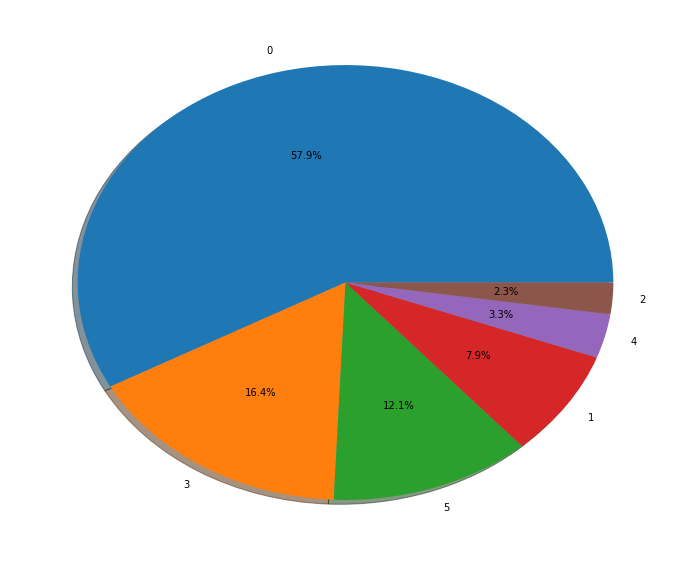

In [21]:
plt.figure(figsize=(12,10))
clust1 = pd.DataFrame(cluster1.labels_)
clust1.columns = ['A']
plt.pie(clust1['A'].value_counts(), labels=clust1['A'].value_counts().index, autopct='%1.1f%%', shadow=True)

In [21]:
data['Type'] = cluster.labels_

In [22]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,5
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,5
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,5
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,5


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].as_matrix()

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [68]:
y = data[['Type']].as_matrix()

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [69]:
print(X.shape, y.shape)

(214, 9) (214, 1)


In [79]:
clf = LinearDiscriminantAnalysis(n_components=2, solver='eigen').fit(X,y)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
X = pd.DataFrame(data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])
y = pd.DataFrame(data[['Type']])
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [27]:
y.head()

,Type
0,0
1,5
2,5
3,5
4,5


In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [35]:
kfold = KFold(n_splits=5,shuffle=True, random_state = 1)

r2_score_list = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = SVC().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    r2_score_list.append(score)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

In [36]:
print('Accuracy of 5 fold cross validation sets: ',r2_score_list,' Average accuracy is',np.mean(r2_score_list))

Accuracy of 5 fold cross validation sets:  [0.3709854817421909, 0.6101623445076956, 0.6664998749061797, 0.6601792875678225, 0.4308326105810929]  Average accuracy is 0.5477319198609963


In [37]:
from sklearn.model_selection import cross_val_score
model = SVC()
cv_scores = cross_val_score(model,X,y,cv=5)
print(cv_scores,np.mean(cv_scores))

[0.71111111 0.84444444 0.90909091 0.87804878 0.8974359 ] 0.8480262285140334


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_estimators=5, random_state=100)
cv_scores = cross_val_score(model,X,y,cv=5)
print('Accuracy of 4 fold validation set: ',cv_scores,'Average Accuracy is',np.mean(cv_scores))

Accuracy of 4 fold validation set:  [0.77777778 0.91111111 0.86363636 0.90243902 0.84615385] Average Accuracy is 0.8602236246138684


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column